<a href="https://colab.research.google.com/github/banned-from-uni/SWELL-DL/blob/main/SWELL-1D-CNN-Full-34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1: Gather & Store Data

In [3]:
train = pd.read_csv('/content/drive/My Drive/SWELL/train.csv').drop('datasetId',axis=1)
test = pd.read_csv('/content/drive/My Drive/SWELL/test.csv').drop('datasetId',axis=1)

## Part 2: Clean & Organize Data

In [4]:
swell = pd.concat([train,test], axis=0)
swell = swell.reset_index(drop=True)

## Part 3: EDA

## What does the dataset look like?

In [5]:
swell

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410317,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,...,99.964170,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,time pressure
410318,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,...,91.377081,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,interruption
410319,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,...,89.839595,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,no stress
410320,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,...,93.094387,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,no stress


In [6]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

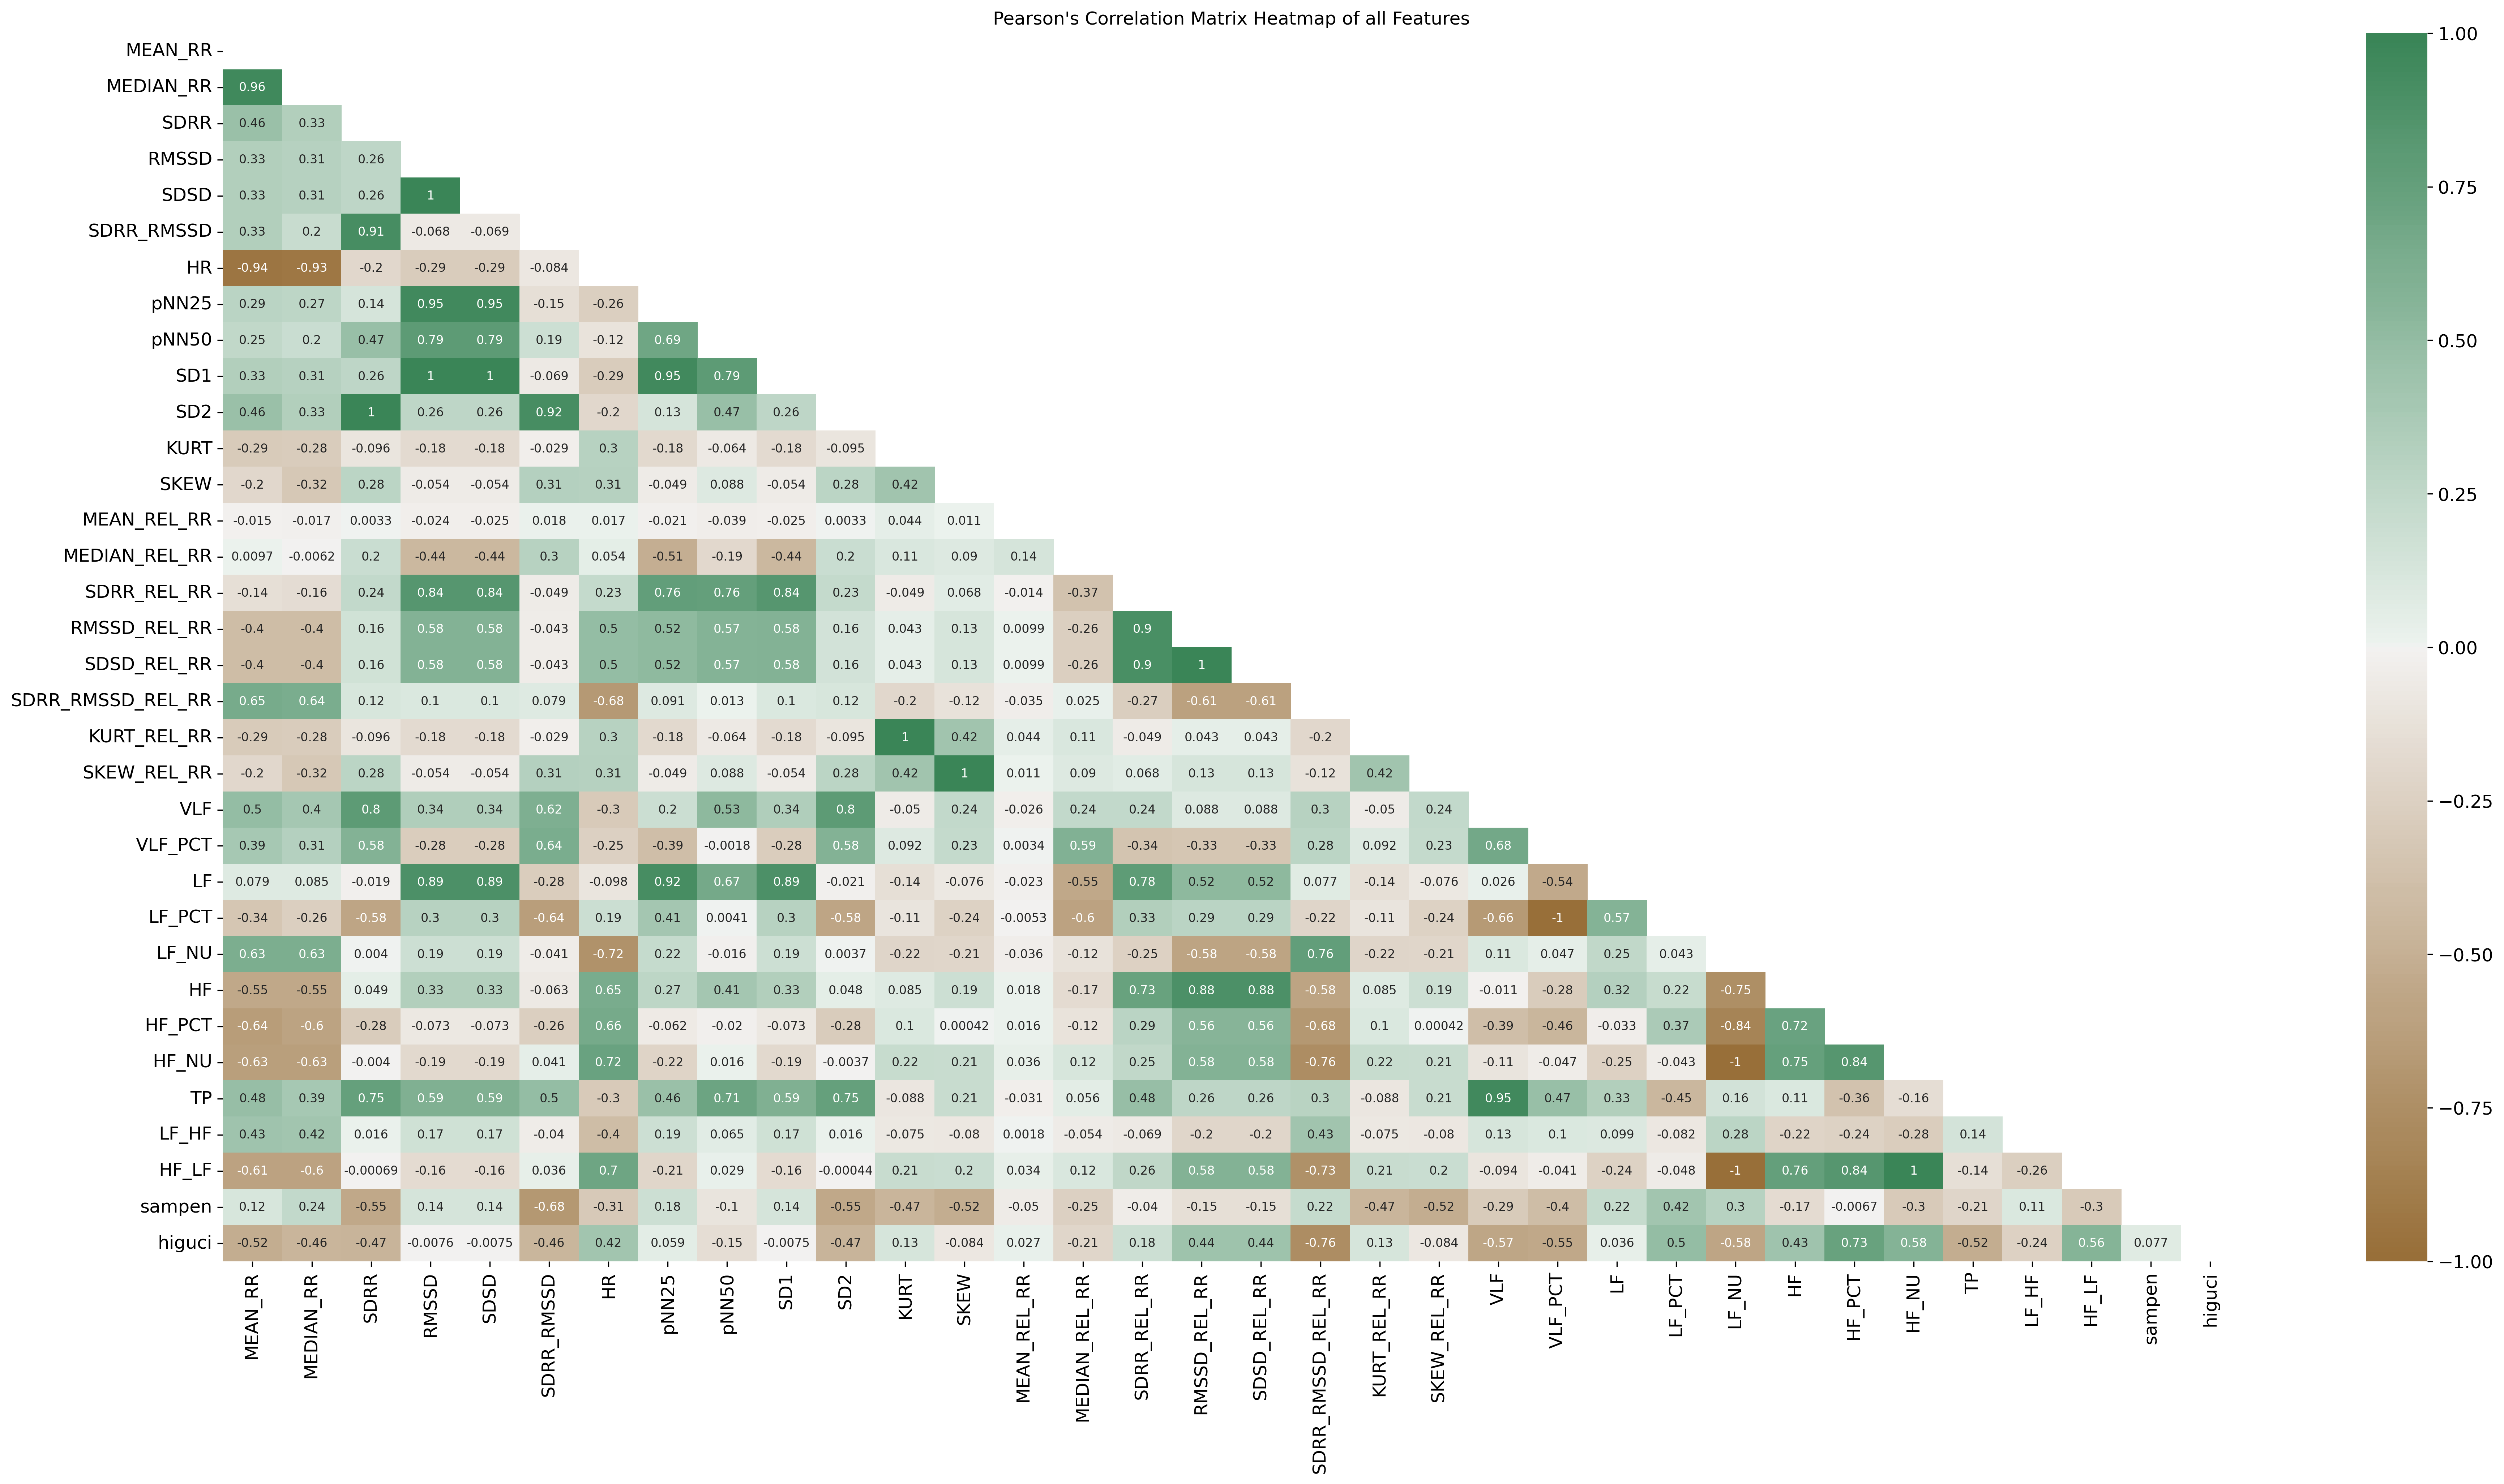

In [7]:
plt.figure(figsize=(30, 15),dpi=300)
plt.title("Pearson's Correlation Matrix Heatmap of all Features")

correlation_matrix = swell.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
correlation_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=False, annot=True, mask=mask
);

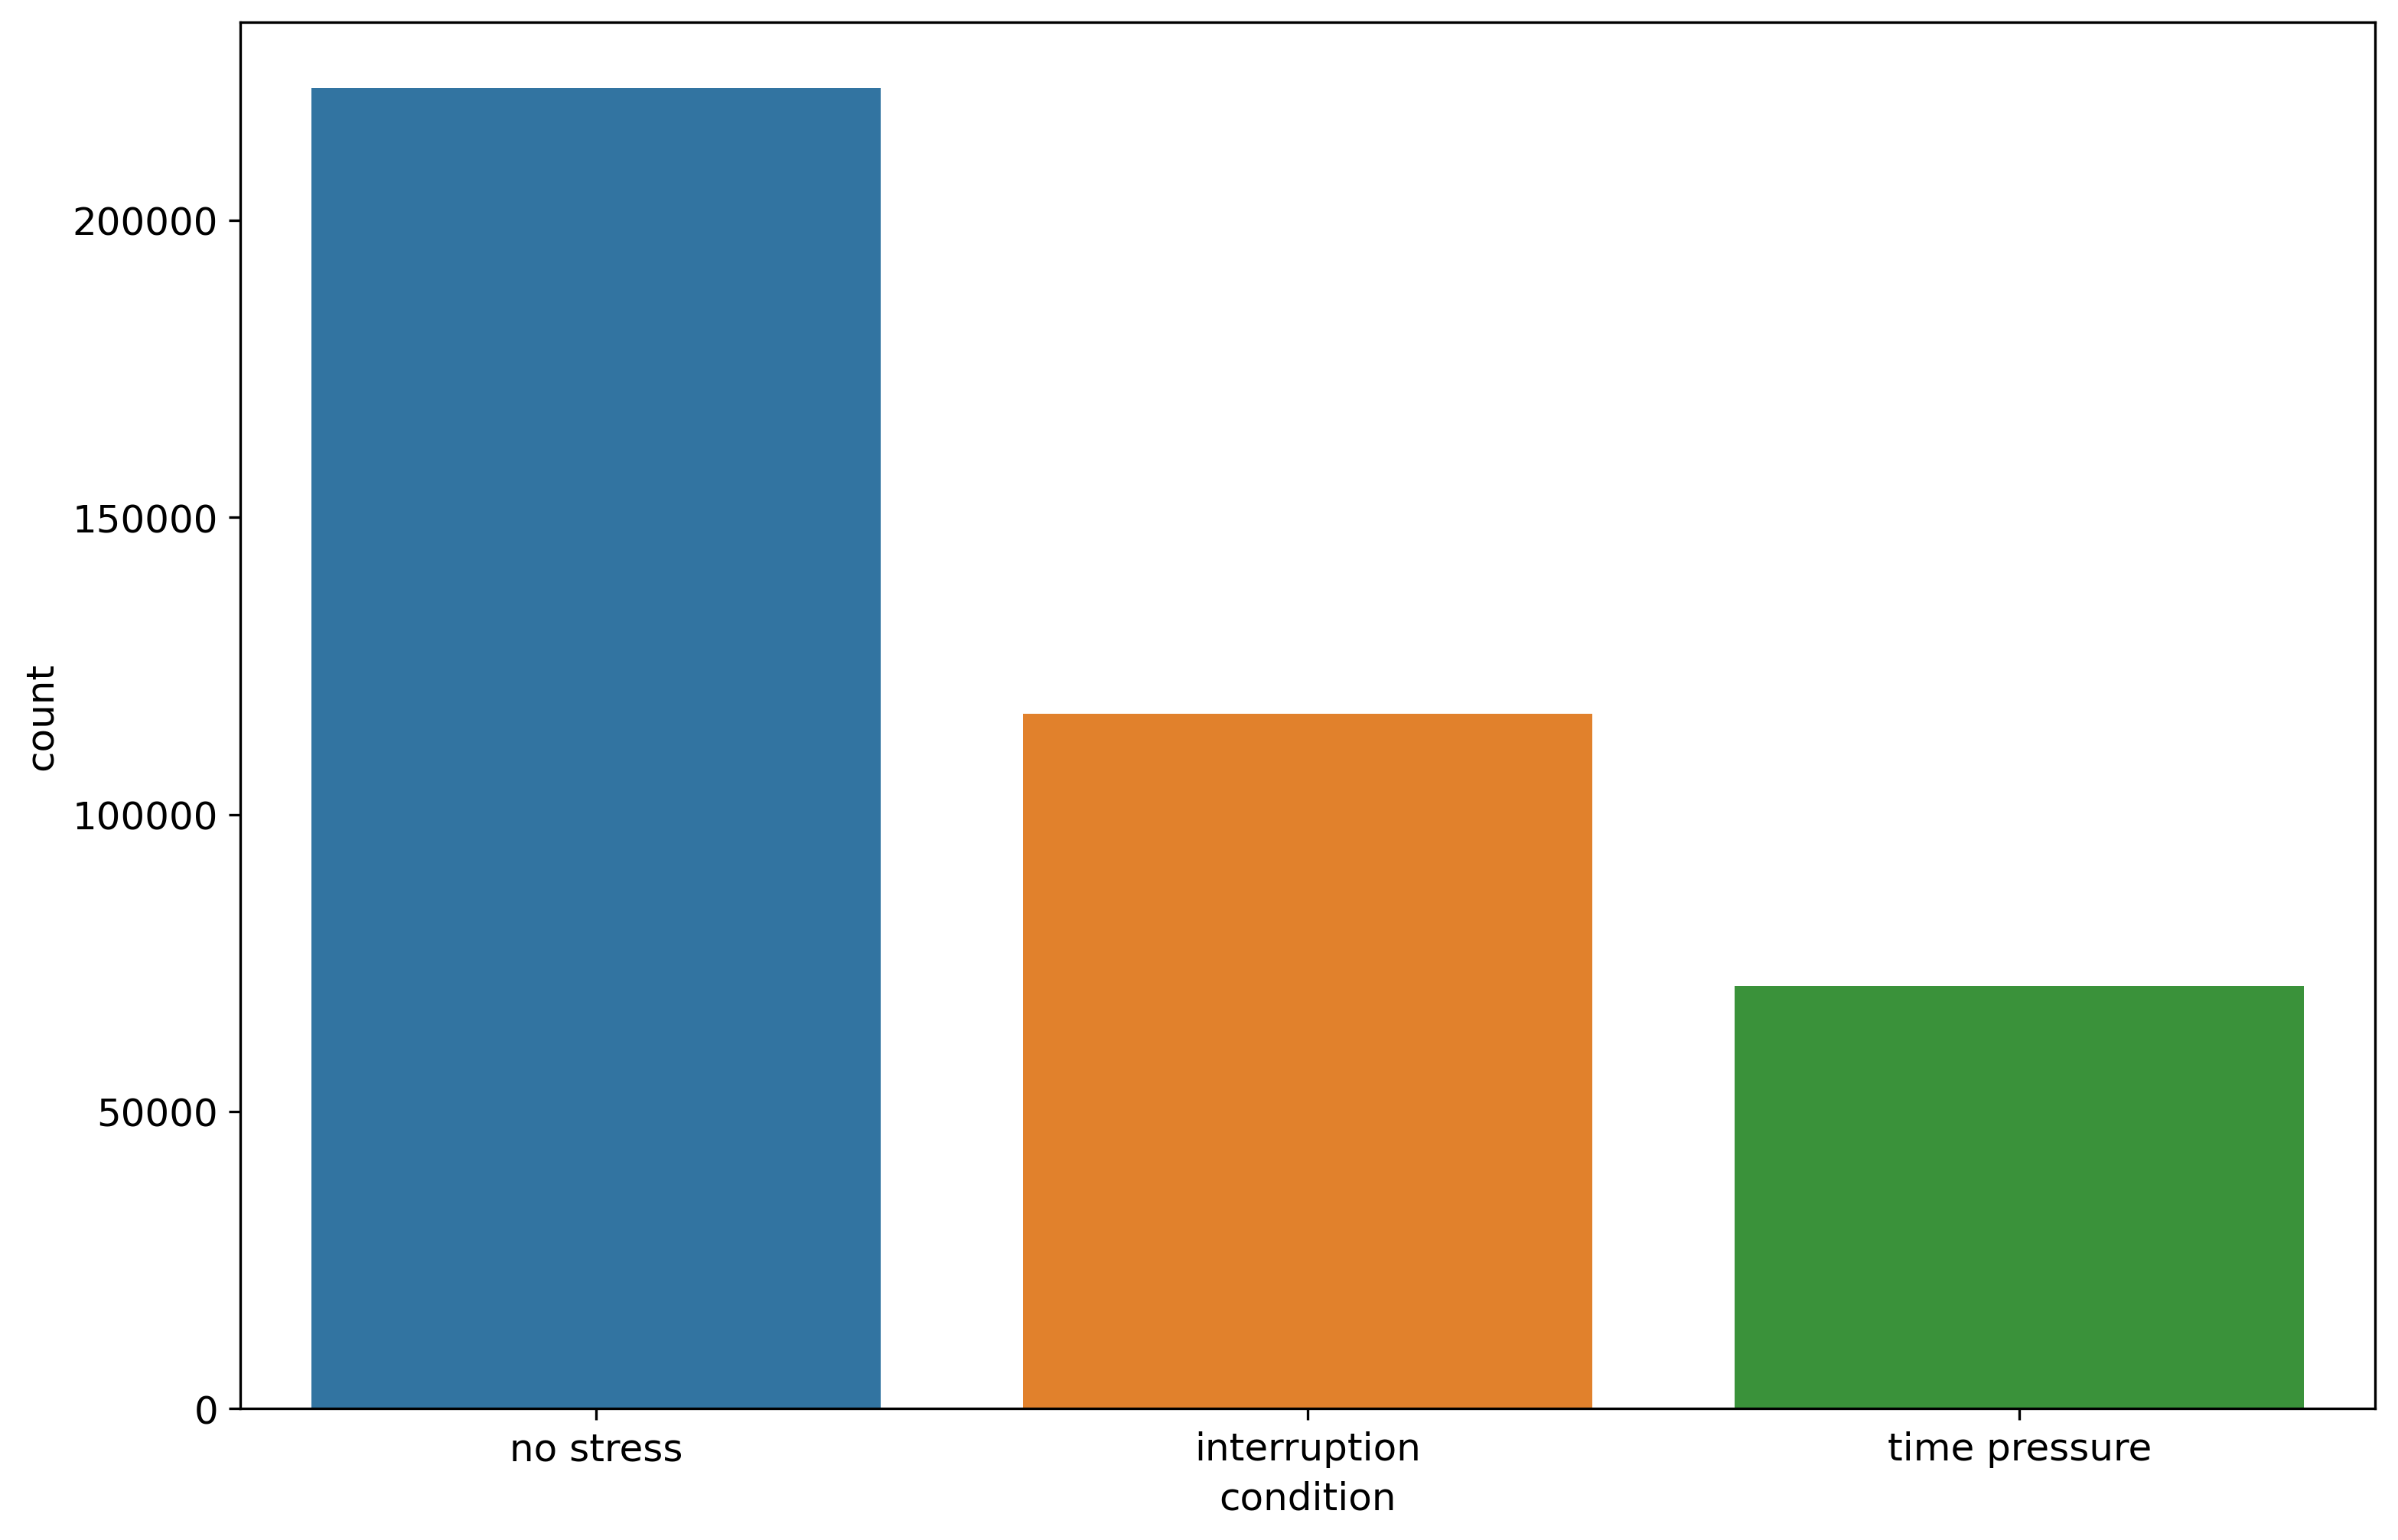

In [8]:
plt.figure(figsize=(12,8),dpi=300)
sns.countplot(data=swell,x='condition');

## Part 4: Machine Learning

### Feature Selection

In [9]:
X = swell.drop('condition',axis=1).to_numpy()
y = swell['condition']

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
print(y.unique())
y = encoder.fit_transform(y)
print(np.unique(y))

['no stress' 'interruption' 'time pressure']
[0 1 2]


In [11]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
print(X.shape)
print(y.shape)

(410322, 34)
(410322,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=101)

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func=f_classif,k='all')
best_features.fit_transform(X_train, y_train)

array([[9.73061580e+02, 8.46926255e+02, 3.34664390e+02, ...,
        2.72285073e-02, 1.91319091e+00, 1.10335975e+00],
       [9.21175581e+02, 8.61101565e+02, 1.56526471e+02, ...,
        1.05024859e-02, 1.79063402e+00, 1.15988336e+00],
       [8.12775864e+02, 8.12742645e+02, 5.55332993e+01, ...,
        9.91698059e-02, 2.17372436e+00, 1.32492404e+00],
       ...,
       [8.00614309e+02, 8.04241965e+02, 1.04770495e+02, ...,
        3.25646901e-02, 2.07073594e+00, 1.19437508e+00],
       [8.07254136e+02, 8.09242770e+02, 6.30819105e+01, ...,
        3.69676823e-02, 2.22276204e+00, 1.25062506e+00],
       [8.51972749e+02, 8.58354115e+02, 5.84883211e+01, ...,
        2.08253077e-02, 1.98160116e+00, 1.16253452e+00]])

In [15]:
anova = pd.Series(data=best_features.scores_,index=swell.columns[:-1])
anova = anova.sort_values(ascending=False)

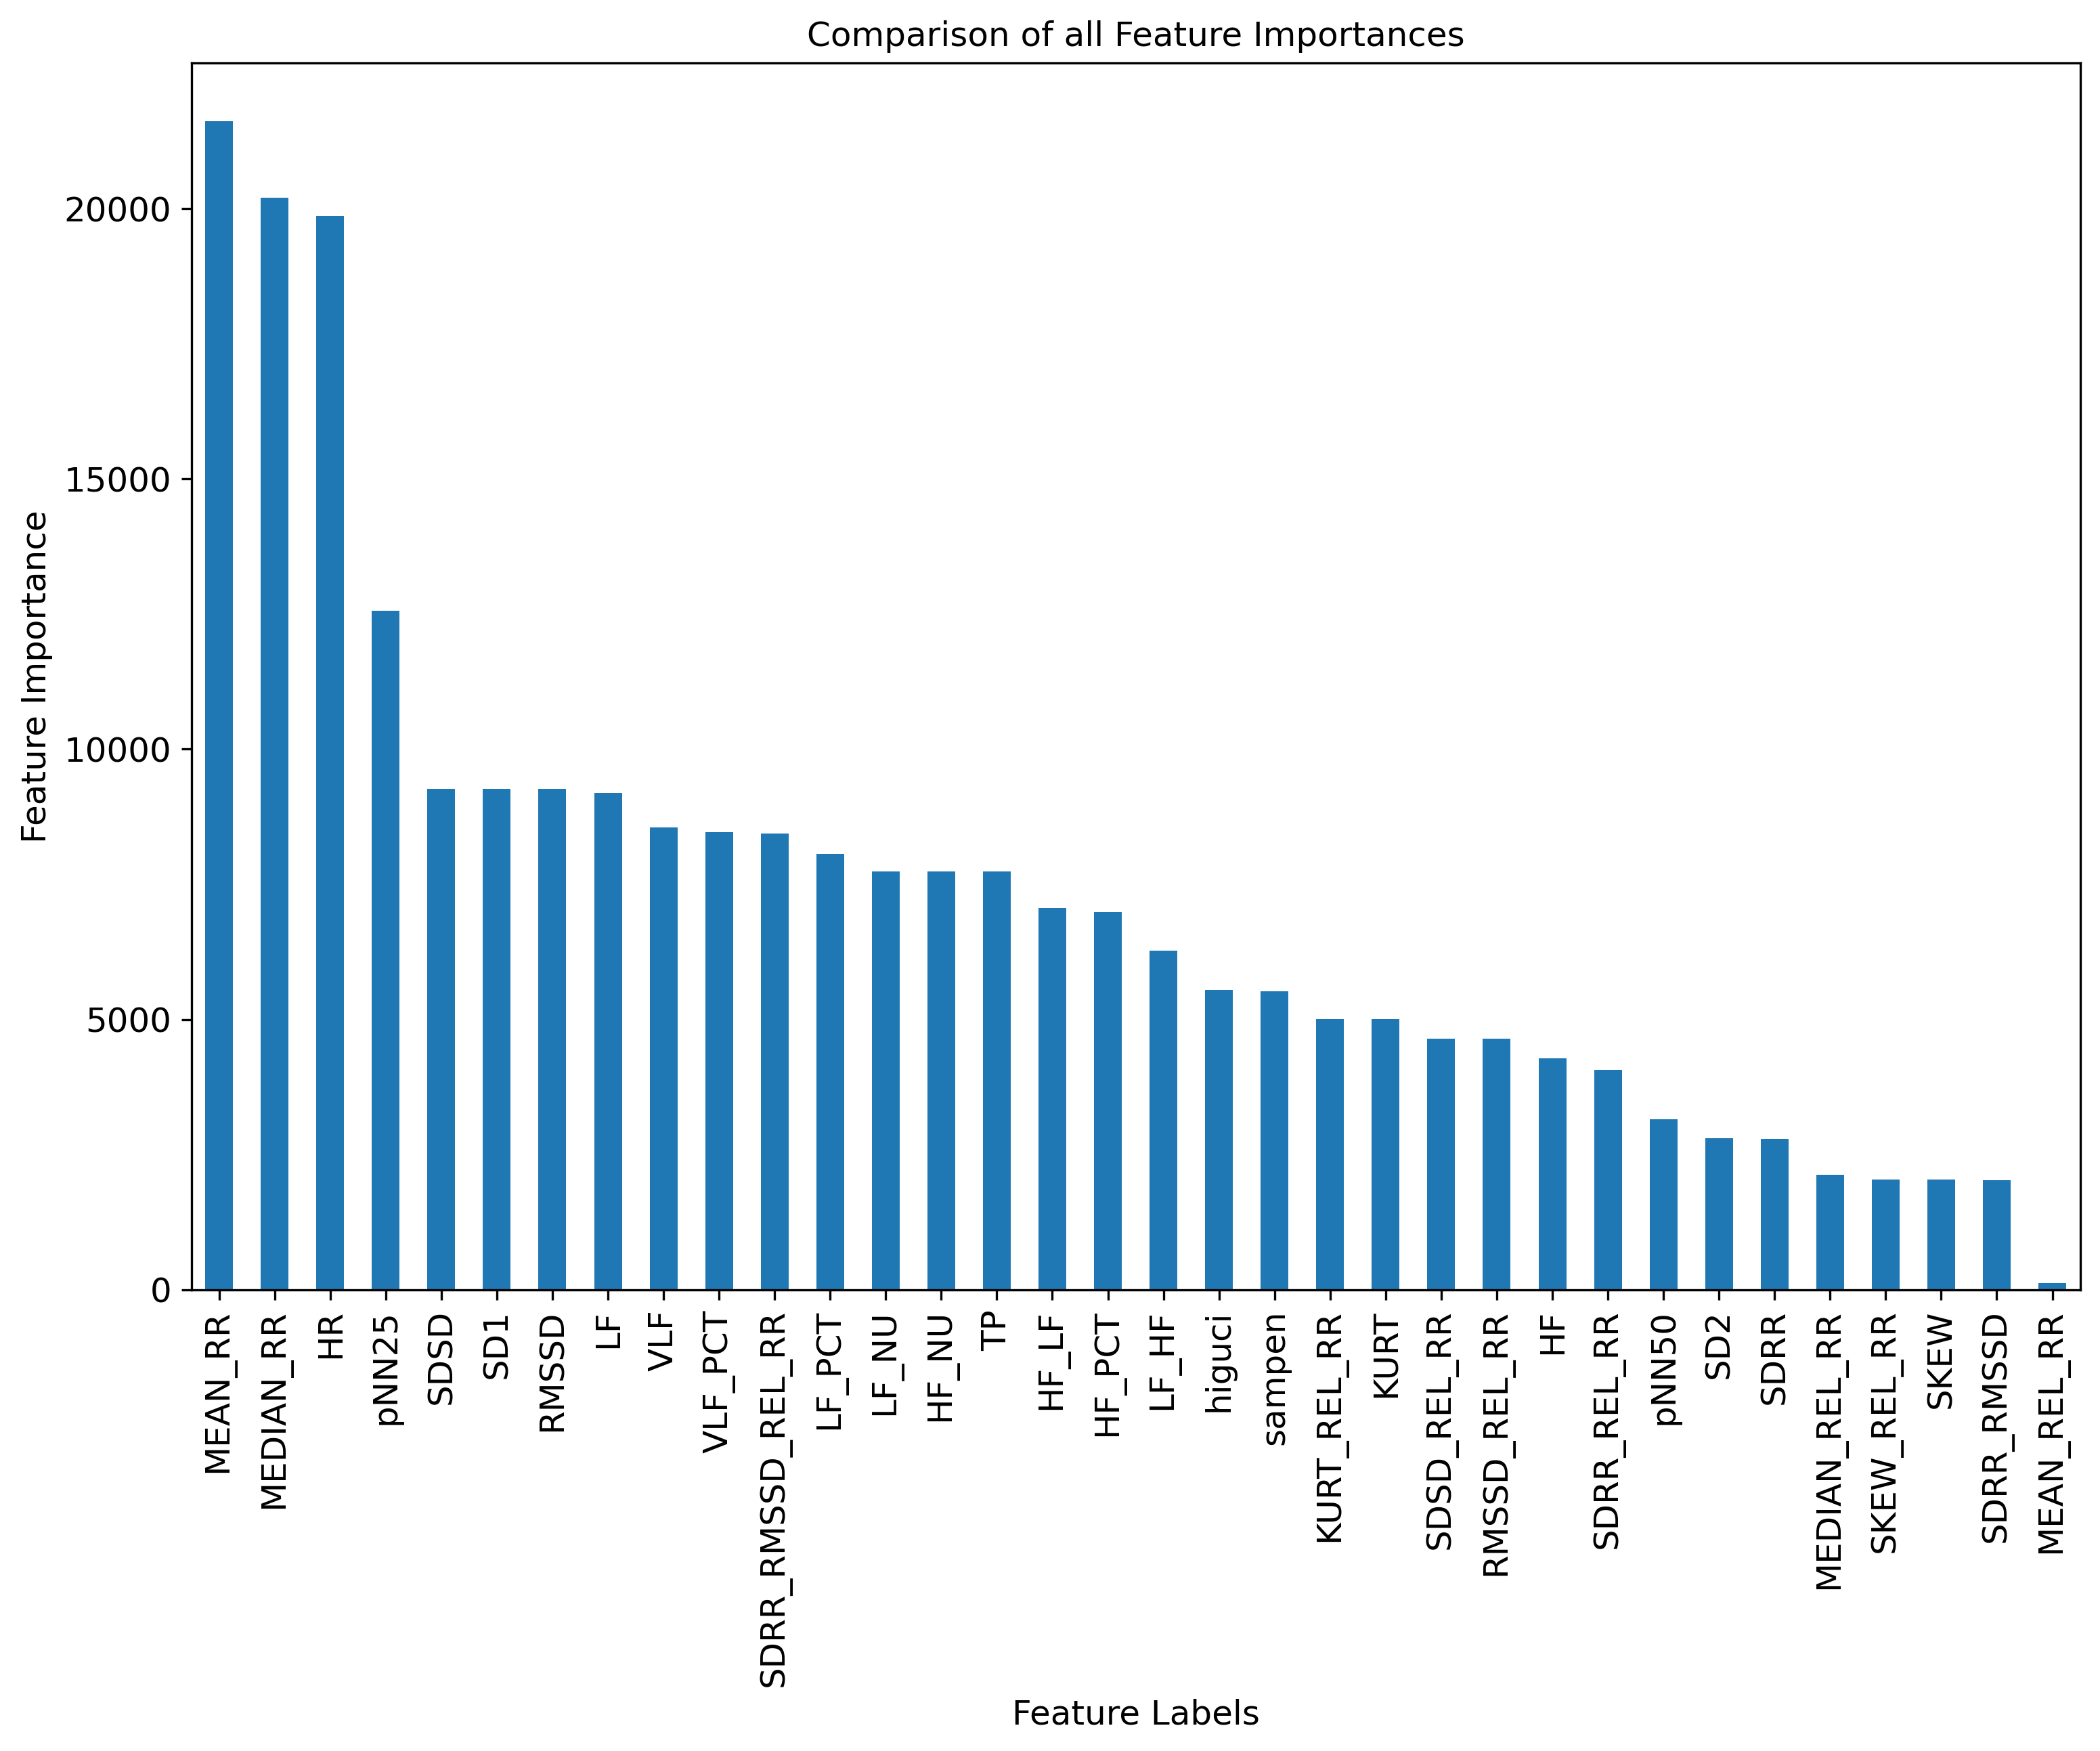

In [16]:
plt.figure(figsize=(12, 8),dpi=300)
plt.xlabel("Feature Labels")
plt.ylabel("Feature Importance")
plt.title("Comparison of all Feature Importances")
anova.plot.bar();

### 1D CNN

In [17]:
feature_names = anova.index

In [18]:
feature_names

Index(['MEAN_RR', 'MEDIAN_RR', 'HR', 'pNN25', 'SDSD', 'SD1', 'RMSSD', 'LF',
       'VLF', 'VLF_PCT', 'SDRR_RMSSD_REL_RR', 'LF_PCT', 'LF_NU', 'HF_NU', 'TP',
       'HF_LF', 'HF_PCT', 'LF_HF', 'higuci', 'sampen', 'KURT_REL_RR', 'KURT',
       'SDSD_REL_RR', 'RMSSD_REL_RR', 'HF', 'SDRR_REL_RR', 'pNN50', 'SD2',
       'SDRR', 'MEDIAN_REL_RR', 'SKEW_REL_RR', 'SKEW', 'SDRR_RMSSD',
       'MEAN_REL_RR'],
      dtype='object')

In [19]:
X = swell[feature_names].to_numpy()
#X = swell[feature_names[:15]].to_numpy()
y = swell['condition']

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=101)

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
print(y_train.unique())
train_class_names = y_train
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
print(np.unique(y_train))

['no stress' 'interruption' 'time pressure']
[0 1 2]


In [22]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)

(328257, 34)
(328257, 1, 34)


In [25]:
from timeit import default_timer as timer

class TimingCallback(tf.keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

def create_model():
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=2,
                   activation="relu", padding="same"))
  model.add(Dense(16, activation="relu"))
  model.add(MaxPooling1D(padding='same'))
  model.add(Flatten())
  model.add(Dense(3, activation = 'softmax'))

  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = "adam",
                metrics = ['accuracy'])

  return model

In [28]:
try:
  with tf.device('/CPU:0'):
    model = create_model()
    history = model.fit(X_train, y_train, batch_size=64,
              epochs=150, verbose = 1,
              validation_data=(X_test, y_test),
              callbacks = [cb])
  print(f'Training timer: {sum(cb.logs)} seconds')
  cb.logs.clear()
except KeyboardInterrupt:
  cb.logs.clear()
  raise Exception('KeyboardInterrupt. Cleared timing logs.')

Epoch 1/150
5130/5130 [==============================] - 11s 2ms/step - loss: 0.6147 - accuracy: 0.7305 - val_loss: 0.4293 - val_accuracy: 0.8304
Epoch 2/150
5130/5130 [==============================] - 12s 2ms/step - loss: 0.3484 - accuracy: 0.8666 - val_loss: 0.2801 - val_accuracy: 0.9019
Epoch 3/150
5130/5130 [==============================] - 11s 2ms/step - loss: 0.2454 - accuracy: 0.9111 - val_loss: 0.2090 - val_accuracy: 0.9233
Epoch 4/150
5130/5130 [==============================] - 10s 2ms/step - loss: 0.1870 - accuracy: 0.9336 - val_loss: 0.1619 - val_accuracy: 0.9467
Epoch 5/150
5130/5130 [==============================] - 10s 2ms/step - loss: 0.1484 - accuracy: 0.9479 - val_loss: 0.3060 - val_accuracy: 0.8670
Epoch 6/150
5130/5130 [==============================] - 11s 2ms/step - loss: 0.1224 - accuracy: 0.9573 - val_loss: 0.1112 - val_accuracy: 0.9632
Epoch 7/150
5130/5130 [==============================] - 12s 2ms/step - loss: 0.1022 - accuracy: 0.9643 - val_loss: 0.0875 -

In [29]:
loss, accuracy = model.evaluate(X_train, y_train)
print("Loss:", loss, " Accuracy:", accuracy)

10259/10259 [==============================] - 13s 1ms/step - loss: 0.0280 - accuracy: 0.9936
Loss: 0.02802376262843609  Accuracy: 0.9935507774353027


In [30]:
pred = model.predict(X_test)
pred_y = pred.argmax(axis=-1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_y)

[[23224     5    20]
 [  191 44153   151]
 [   67   127 14127]]


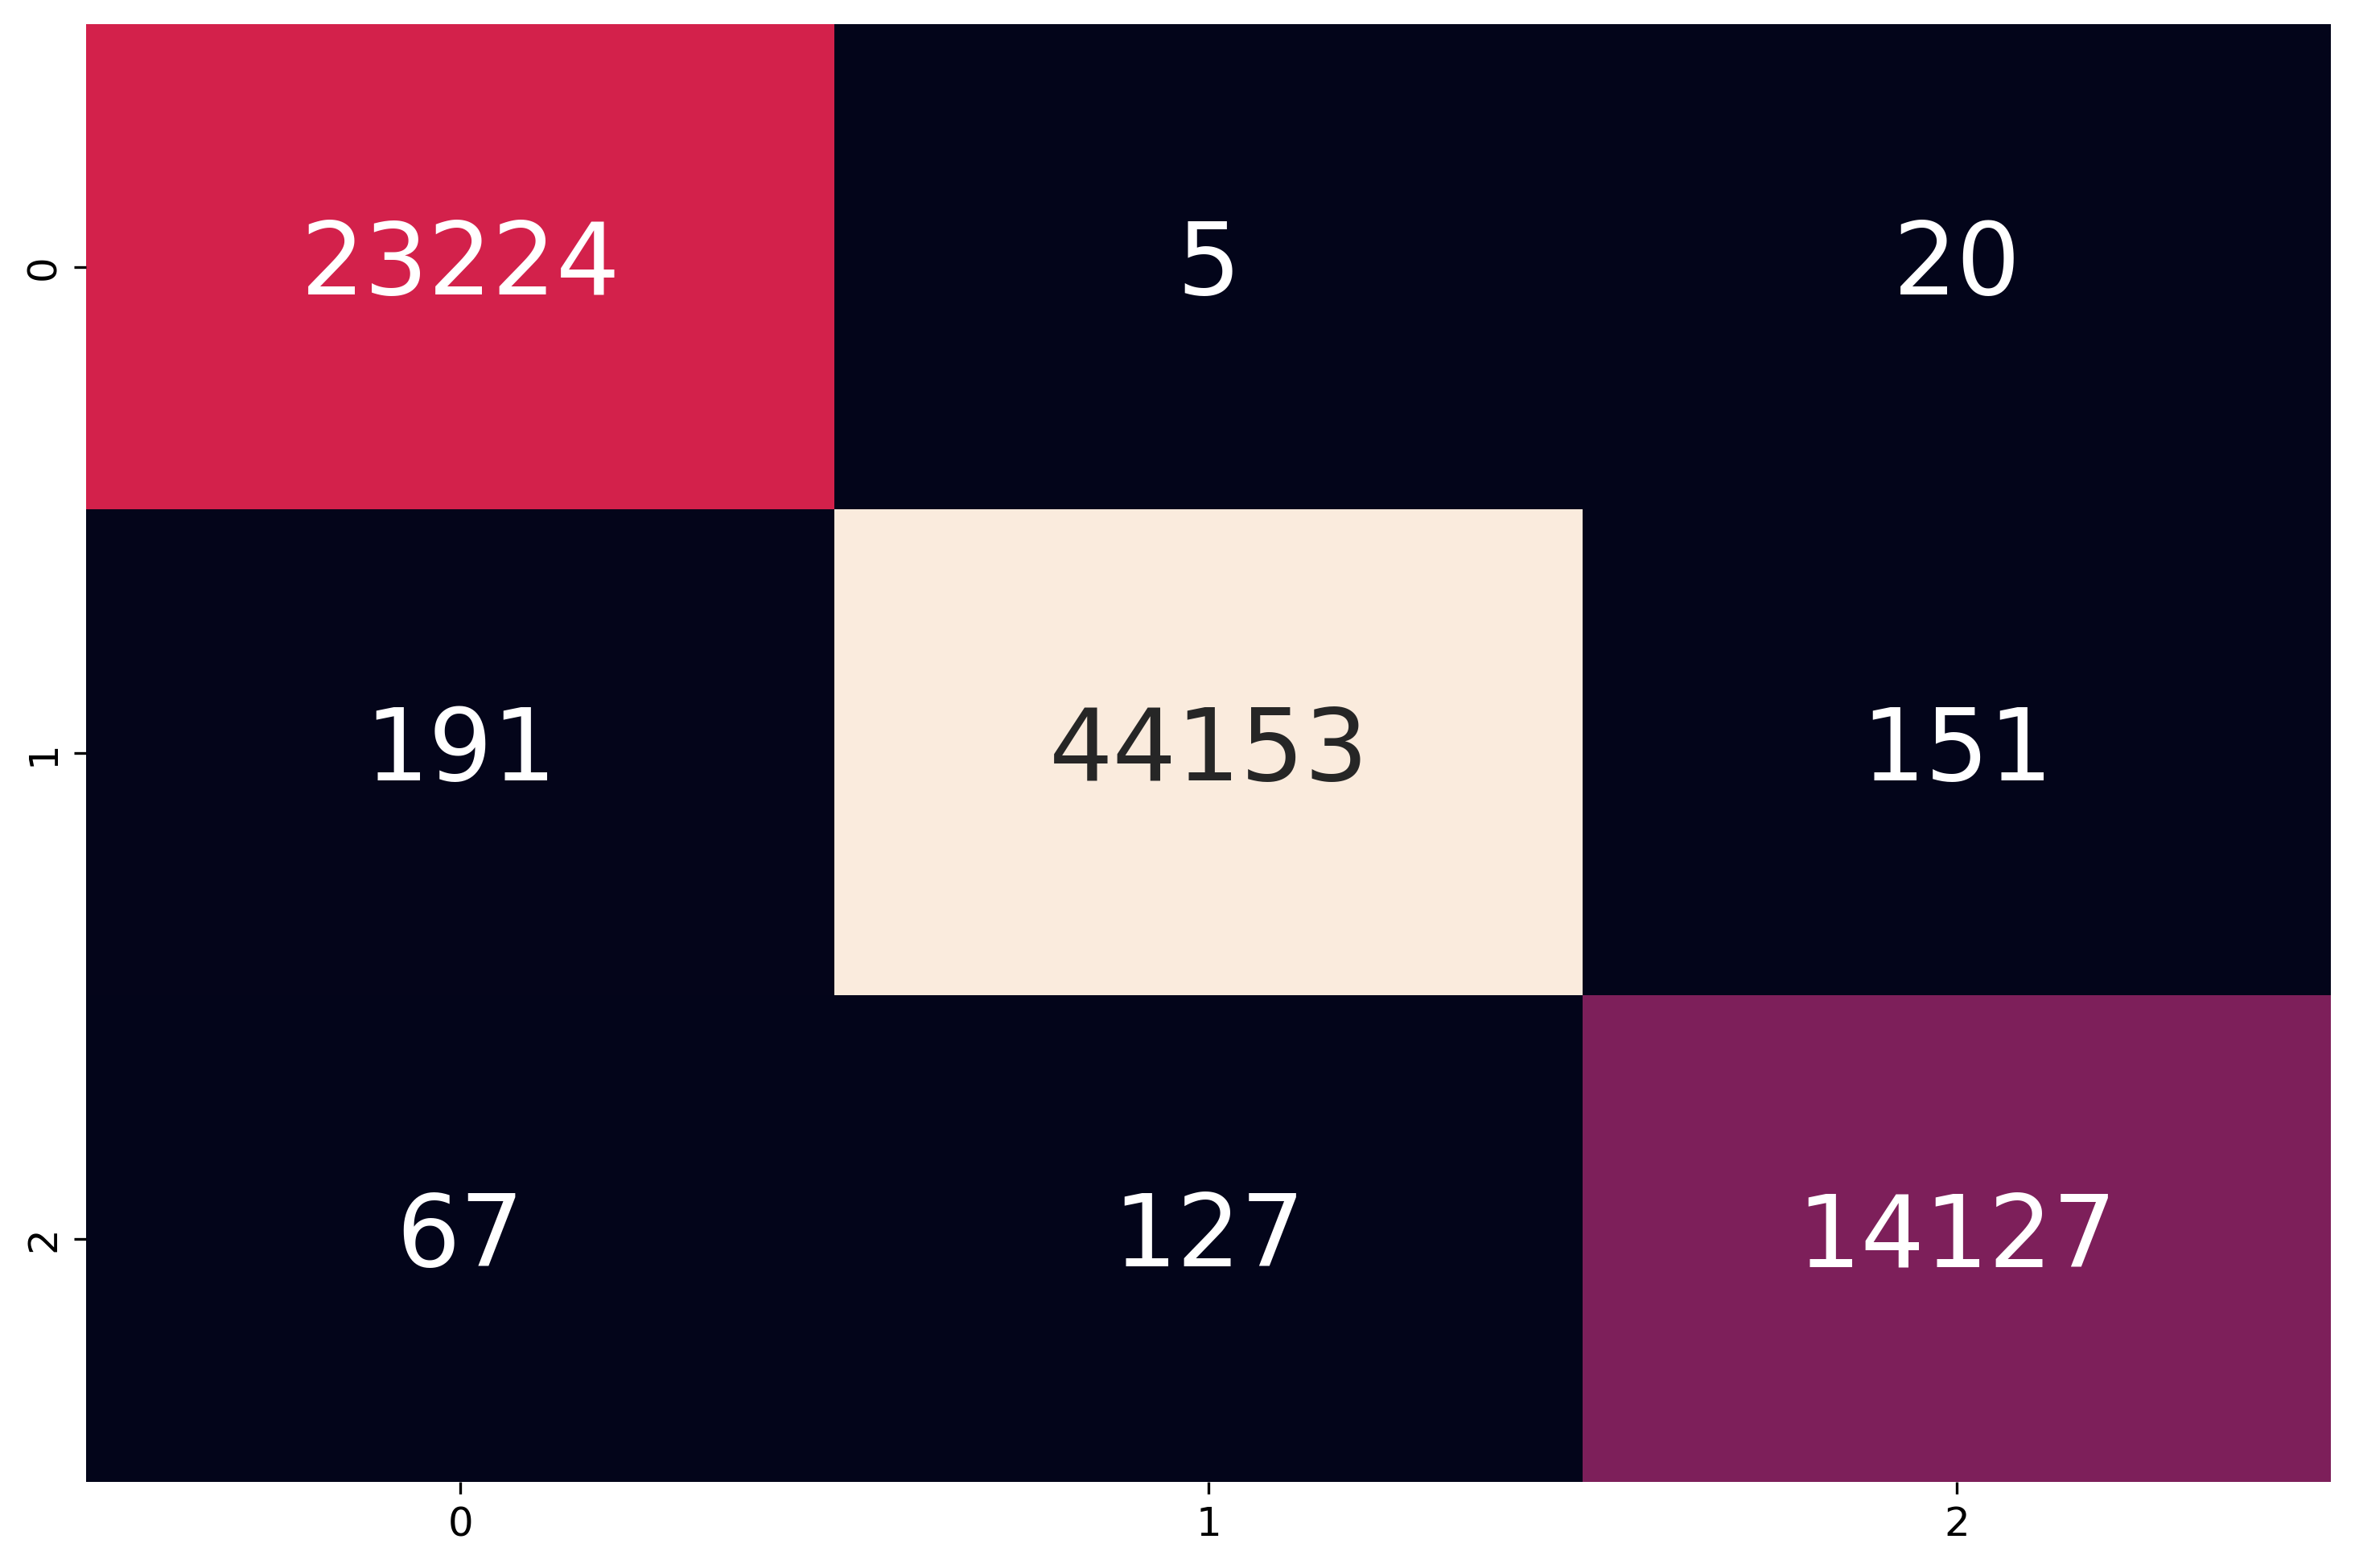

In [31]:
# old cm plot
print(cm)
plt.figure(figsize=(12,8),dpi=300)
sns.heatmap(cm, annot=True, cbar = False,fmt='.10g', annot_kws={"fontsize":30});

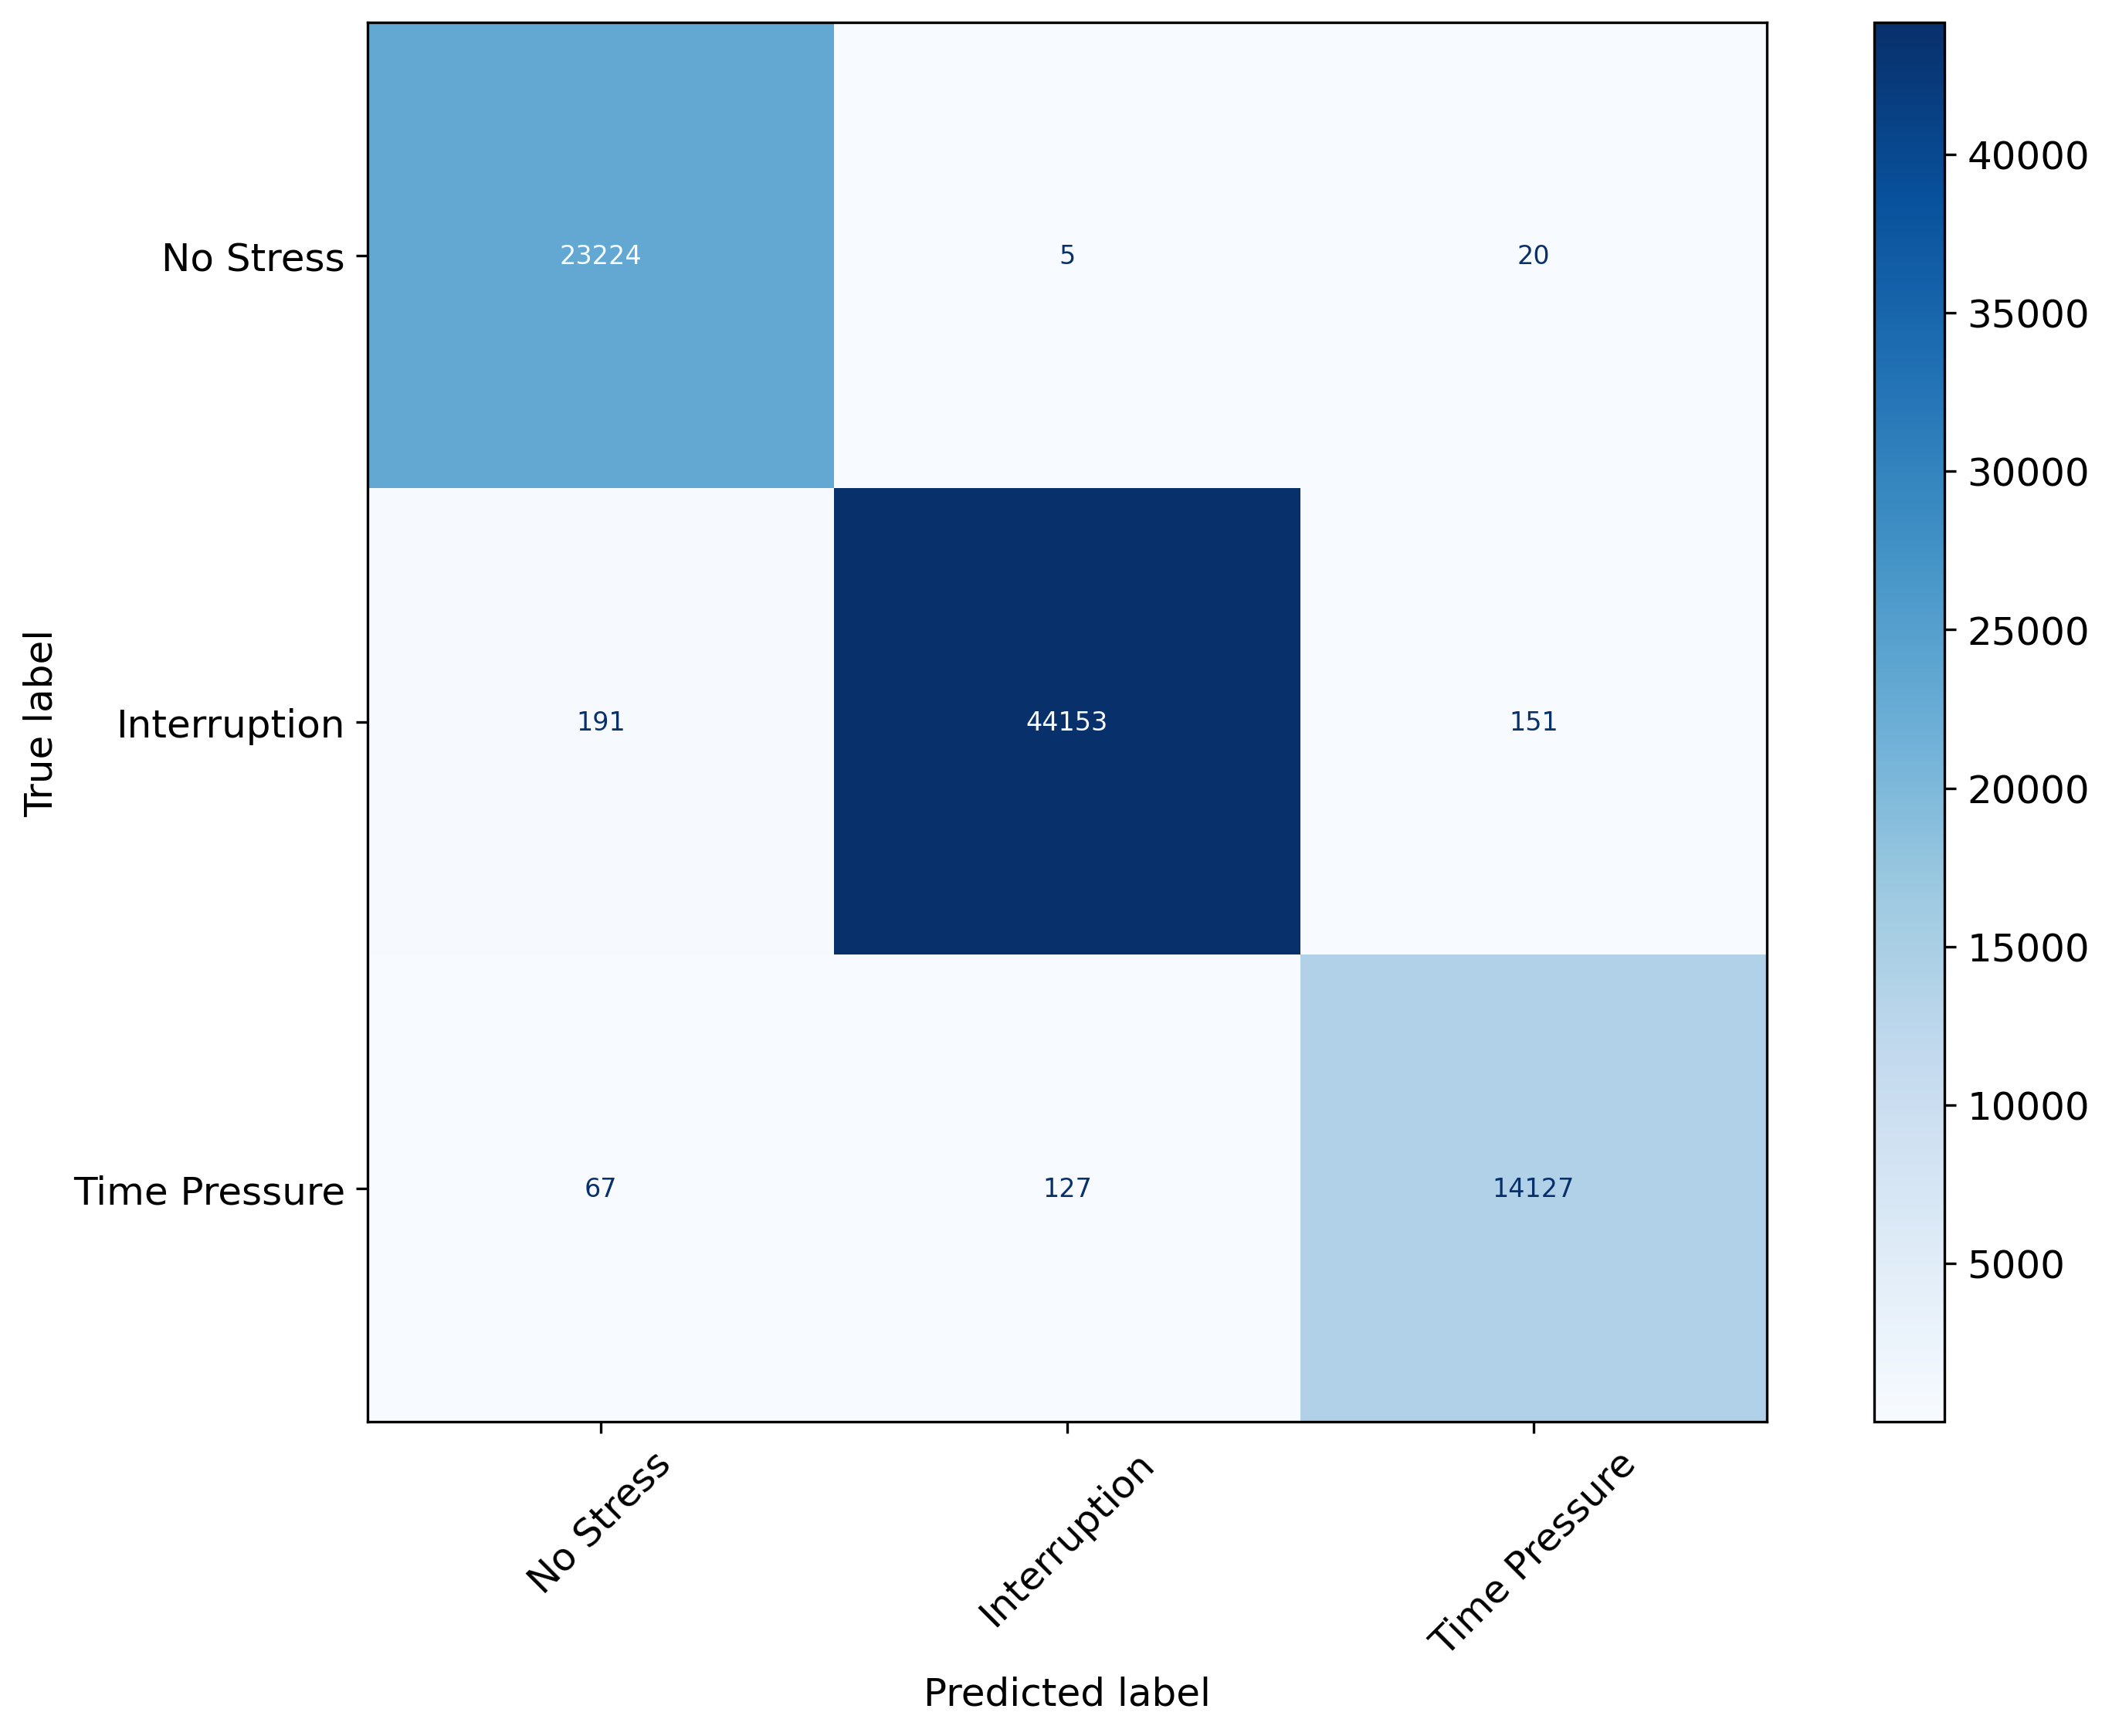

In [32]:
# new cm plot
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

labels = ["No Stress", "Interruption", "Time Pressure"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

_, ax = plt.subplots(figsize=(12,8),dpi=300)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45,
          values_format='.10g', ax=ax);

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23249
           1       1.00      0.99      0.99     44495
           2       0.99      0.99      0.99     14321

    accuracy                           0.99     82065
   macro avg       0.99      0.99      0.99     82065
weighted avg       0.99      0.99      0.99     82065



In [34]:
pred = model.predict(X_test[:30])
pred_y = pred.argmax(axis=-1)
print(f"Actual:    {pred_y}")
print(f"Predicted: {y_test[:30]}")

Actual:    [1 0 1 2 1 1 1 2 1 0 1 2 0 1 1 1 1 0 1 1 1 1 0 1 0 2 1 0 0 0]
Predicted: [1 0 1 2 1 1 1 2 1 0 1 2 0 1 1 1 1 0 1 1 1 1 0 1 0 2 1 0 0 0]


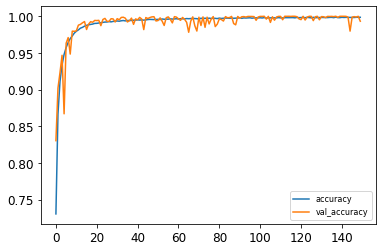

In [35]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy','val_accuracy']].plot();

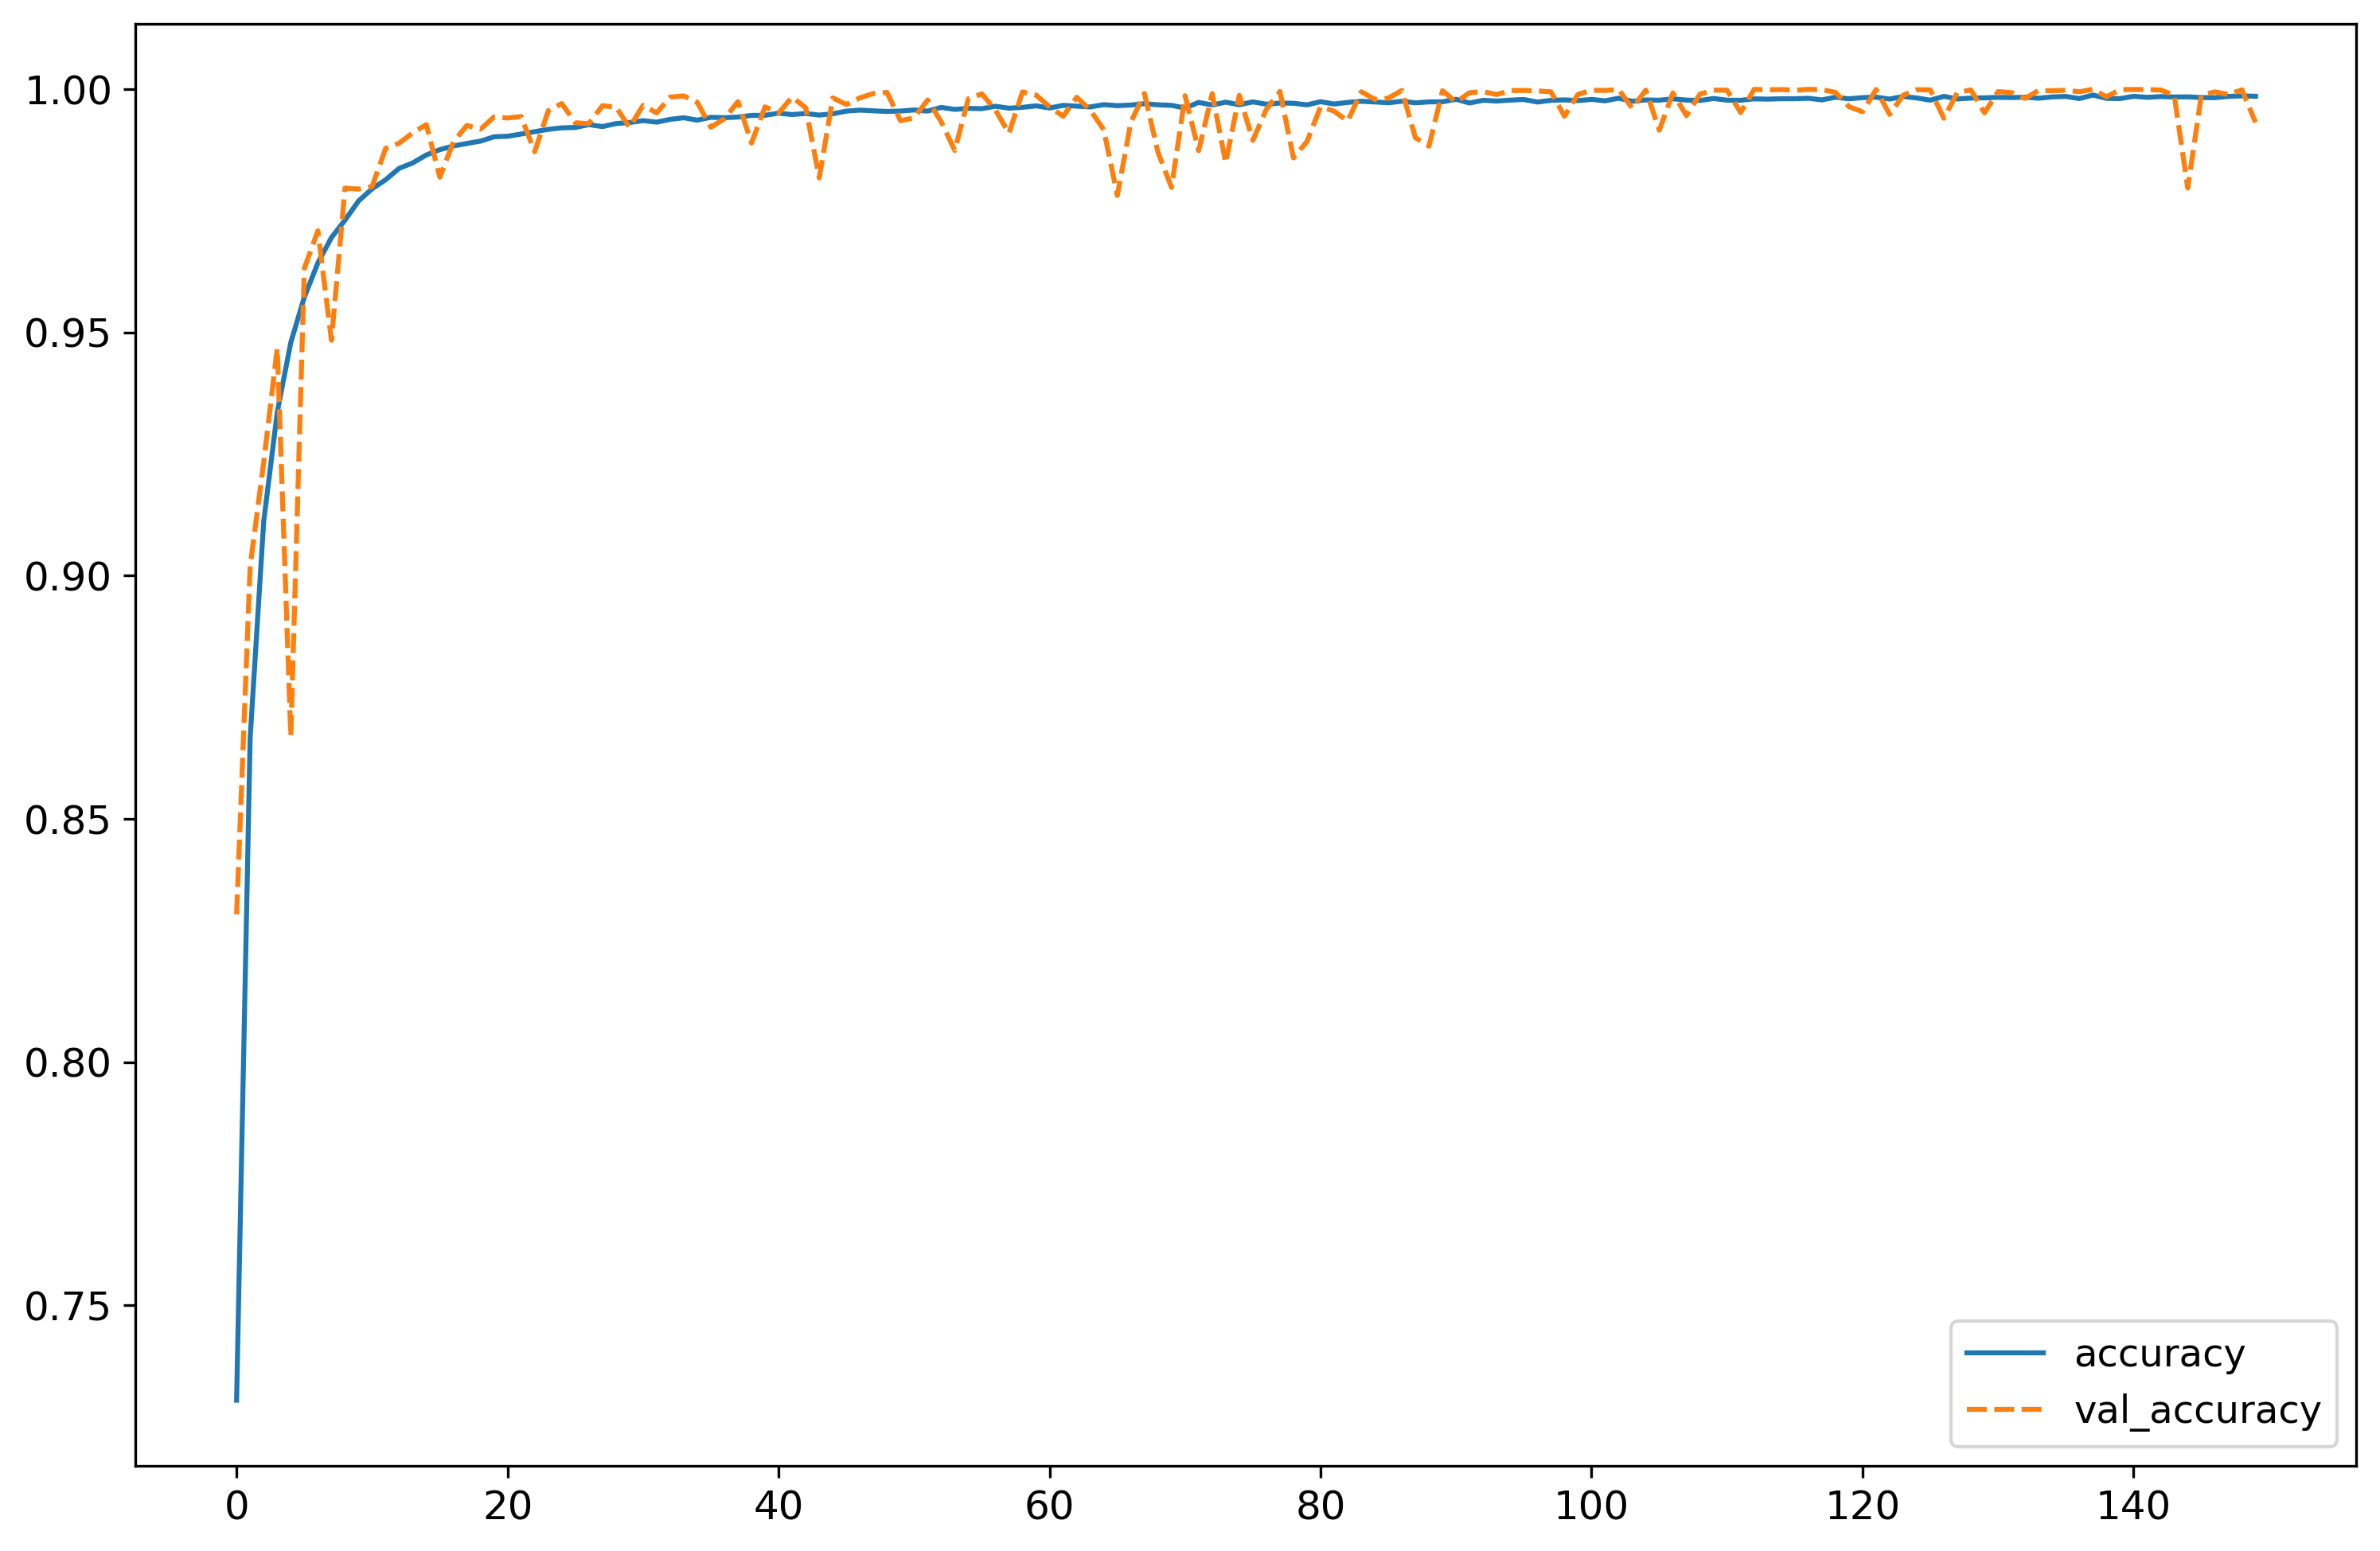

In [36]:
plt.figure(figsize=(12,8),dpi=300)
sns.lineplot(data=history_df[['accuracy','val_accuracy']])
plt.legend(loc='lower right',
           fontsize='x-large',
           title_fontsize='40')

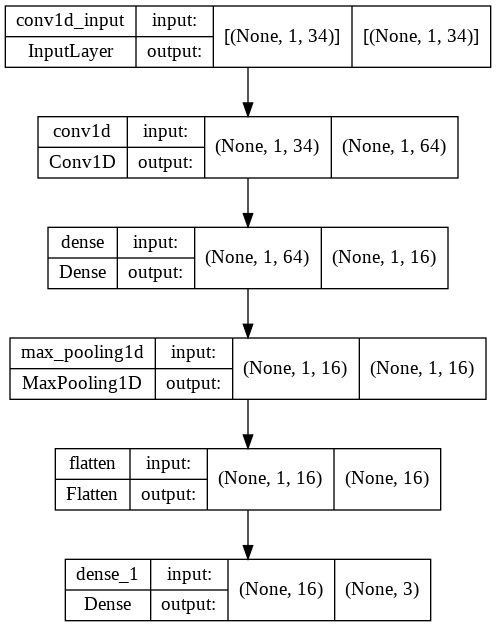

In [37]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             4416      
                                                                 
 dense (Dense)               (None, 1, 16)             1040      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 16)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 5,507
Trainable params: 5,507
Non-trainable params: 0
______________________________________________________

In [39]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.166
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.33
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b